Decision Tree
===


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/Iris.csv")

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<BarContainer object of 3 artists>

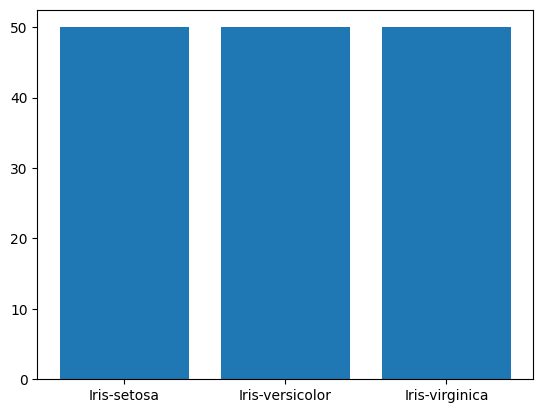

In [18]:
spec_count = df['Species'].value_counts()
plt.bar(spec_count.index,spec_count.values)

In [15]:
df = df.drop(columns="Id")

In [16]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [35]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')

model.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_pred = model.predict(x_test)

[Text(0.4, 0.9, 'PetalLengthCm <= 2.6\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]\nclass = Iris-setosa'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-versicolor'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'PetalWidthCm <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]\nclass = Iris-setosa'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'PetalLengthCm <= 5.0\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-virginica'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-virginica'),
 Text(0.3, 0.3, 'SepalLengthCm <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-setosa'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-setosa'),
 Text(0.8, 0.5, 'PetalLengthCm <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]\nclass = Iris-setosa'),
 Text(0.7

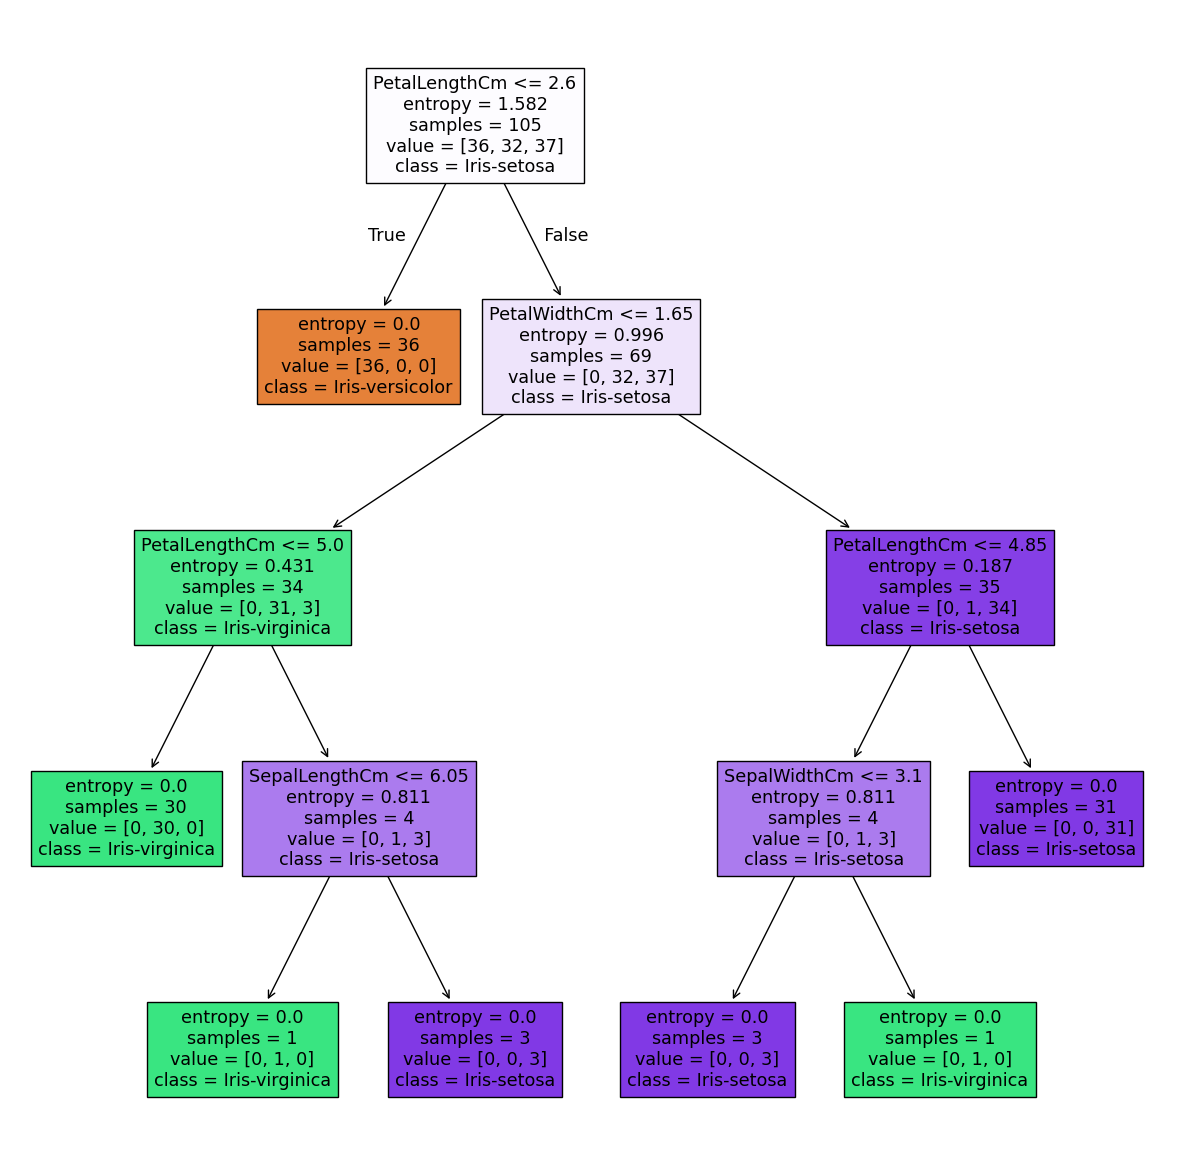

In [37]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['SepalLengthCm','SepalWidthCm',	'PetalLengthCm'	,'PetalWidthCm'],class_names=['Iris-versicolor','Iris-virginica','Iris-setosa'],filled=True)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [39]:
y_test

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

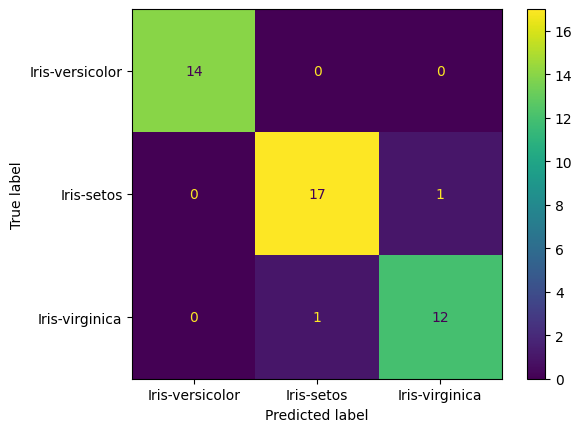

In [40]:
cmd = ConfusionMatrixDisplay(cm,display_labels=['Iris-versicolor','Iris-setos','Iris-virginica'])
cmd.plot()